**Data Preparation**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
dataset_path = '/content/drive/MyDrive/ships-aerial-images'

In [3]:
train_img = '/content/drive/MyDrive/ships-aerial-images/train/images'
train_label = '/content/drive/MyDrive/ships-aerial-images/train/labels'

valid_img = '/content/drive/MyDrive/ships-aerial-images/valid/images'
valid_label = '/content/drive/MyDrive/ships-aerial-images/valid/labels'

test_img = '/content/drive/MyDrive/ships-aerial-images/test/images'
test_label = '/content/drive/MyDrive/ships-aerial-images/test/labels'

In [4]:
import os
import glob


In [27]:
def check_label_matches(image_folder, label_folder):
    images_dir = [os.path.splitext(os.path.basename(f))[0] for f in glob.glob(f"{image_folder}/*.jpg")]
    labels_dir = [os.path.splitext(os.path.basename(f))[0] for f in glob.glob(f"{label_folder}/*.txt")]

    images_set = set(images_dir)
    labels_set = set(labels_dir)

    missing_labels = images_set - labels_set
    missing_images = labels_set - images_set

    if missing_labels:
        print("Images without labels:", len(missing_labels))
    if missing_images:
        print("Labels without images:", len(missing_images))
    if not missing_labels and not missing_images:
        print("All images have matching labels!")

    print(len(images_dir))
    print(len(labels_dir))

In [28]:
check_label_matches(train_img, train_label)

Images without labels: 1
Labels without images: 3
9698
9700


In [29]:
check_label_matches(valid_img, valid_label)

Images without labels: 1
2166
2165


In [30]:
check_label_matches(test_img, test_label)

All images have matching labels!
1573
1573


**Remove unmatched images and labels**

In [33]:
def remove_unmatched(image_dir, label_dir):
  image_files = {os.path.splitext(f)[0] for f in os.listdir(image_dir) if f.endswith(('.jpg'))}
  label_files = {os.path.splitext(f)[0] for f in os.listdir(label_dir) if f.endswith('.txt')}

  labels_without_images = label_files - image_files
  images_without_labels = image_files - label_files

  for name in labels_without_images:
    path = os.path.join(label_dir, name + ".txt")
    if os.path.exists(path):
      os.remove(path)

  for name in images_without_labels:
    for ext in ['.jpg']:
      path = os.path.join(image_dir, name + ext)
      if os.path.exists(path):
        os.remove(path)

  print(f"Cleaned {len(labels_without_images)} labels and {len(images_without_labels)} images")


In [34]:
remove_unmatched(train_img, train_label)

Cleaned 3 labels and 1 images


In [35]:
remove_unmatched(valid_img, valid_label)

Cleaned 0 labels and 1 images


In [36]:
check_label_matches(train_img, train_label)

All images have matching labels!
9697
9697


In [37]:
check_label_matches(valid_img, valid_label)

All images have matching labels!
2165
2165


In [39]:
with open(os.path.join(dataset_path,"data.yaml"),"r") as f:
  print(f.read())

train: /kaggle/input/ships-in-aerial-images/ships-aerial-images/train/images
val: /kaggle/input/ships-in-aerial-images/ships-aerial-images/valid/images
test: /kaggle/input/ships-in-aerial-images/ships-aerial-images/test/images

nc: 1
names: ['ship']


**Bounding Box Visual check**

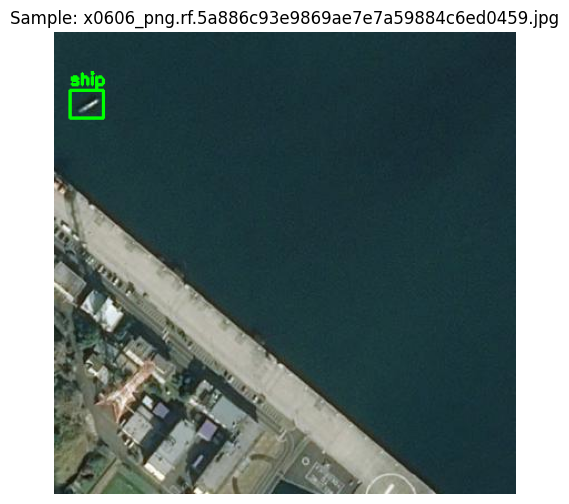

In [44]:
import os
import random
import cv2
import matplotlib.pyplot as plt

images_dir = train_img
labels_dir = train_label

sample_images = random.sample(os.listdir(images_dir), 5)

for img_name in sample_images:
  img_path = os.path.join(images_dir, img_name)
  label_path = os.path.join(labels_dir, img_name.replace('.jpg', '.txt'))

  if not os.path.exists(label_path):
    print(f"{img_name}")
    continue

  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  h, w = img.shape[:2]

#label
with open(label_path, 'r') as f:
  for line in f:
    cls, x, y, bw, bh = map(float, line.split())
    x1 = int((x - bw/2) * w)
    y1 = int((y - bh/2) * h)
    x2 = int((x + bw/2) * w)
    y2 = int((y + bh/2) * h)
    cv2.rectangle(img, (x1, y1), (x2, y2), (0,255,0), 2)
    cv2.putText(img, 'ship', (x1, y1-5),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 2)

plt.figure(figsize=(6,6))
plt.imshow(img)
plt.axis('off')
plt.title(f"Sample: {img_name}")
plt.show()